## Transformações Geométricas

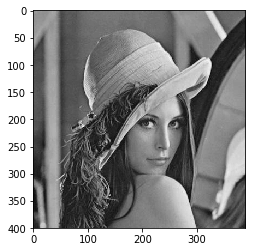

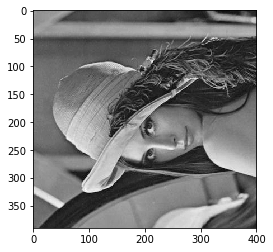

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagemOriginal = cv2.imread('lena.png', 0)

qtdeLinhas, qtdeColunas = imagemOriginal.shape

imagemModificada = np.zeros((qtdeColunas, qtdeLinhas))

for i in range(qtdeLinhas):
    for j in range(qtdeColunas):
        imagemModificada[j,i] = imagemOriginal[i,j]
                

plt.gray()               
plt.imshow(imagemOriginal)
plt.show()          
plt.imshow(imagemModificada)
plt.show()

Realizando rotações

![alt text](rotacao.jpg "Rotacao")

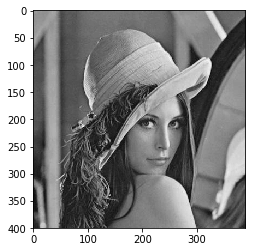

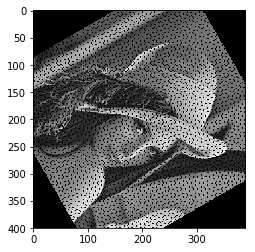

In [3]:
import cv2
import numpy as np
from numpy import median
import matplotlib.pyplot as plt


img = cv2.imread('lena.png', 0)
img = img.astype(float)

qtdeLinhas, qtdeColunas = img.shape
nova_imagem = np.zeros((qtdeLinhas, qtdeColunas))

meio_i = qtdeLinhas/2.0
meio_j = qtdeColunas/2.0

angulo = np.pi/3.0 #60 graus

for i in range(qtdeLinhas):
    for j in range(qtdeColunas):
        novo_i = (i-meio_i)*np.cos(angulo)+(j-meio_j)*np.sin(angulo)+meio_i
        novo_j = -(i-meio_i)*np.sin(angulo)+(j-meio_j)*np.cos(angulo)+meio_j
        novo_i = int(novo_i)
        novo_j = int(novo_j)
        
        if(novo_i < qtdeLinhas and novo_i > 0):
            if(novo_j < qtdeColunas and novo_j > 0):
                nova_imagem[novo_i,novo_j] = img[i,j]
                
plt.gray()               
plt.imshow(img)
plt.show()          
plt.imshow(nova_imagem)
plt.show()

#### FUNÇÃO EM OPENCV PARA REALIZAR ROTAÇÕES:

cv2.getRotationMatrix2D(Point2f center, double angle, double scale)

[[  0.5         -0.8660254  268.87495374]
 [  0.8660254    0.5        -75.70508076]]


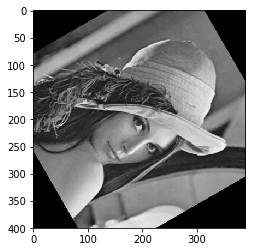

In [4]:
import cv2

img = cv2.imread('lena.png',0)
qtdeLinhas,qtdeColunas = img.shape

M = cv2.getRotationMatrix2D((qtdeLinhas/2,qtdeColunas/2),-60,1)

W = cv2.warpAffine(img, M, (qtdeColunas,qtdeLinhas))


print(M)

plt.imshow(W)
plt.show()

## detectando defeitos na madeira

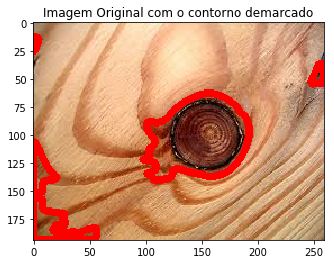

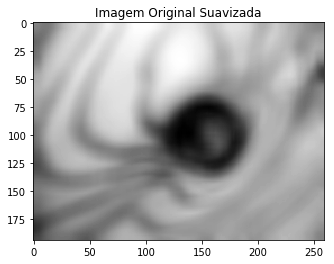

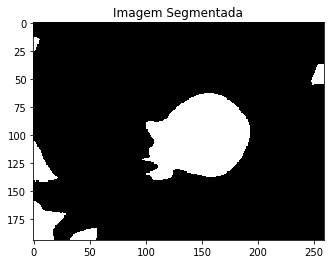

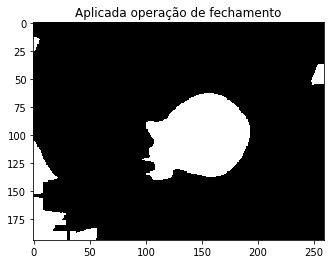

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


imagem = cv2.imread('wood1.jpg')
gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY) 

w1 = cv2.blur(gray, (15, 15)) # aplica blur (filtro da média 5x5)
_, w2 = cv2.threshold(w1, 120, 255, cv2.THRESH_BINARY_INV) #seleciona apenas os pixels dentro do intervalo [120,255]

elementoEstruturante = cv2.getStructuringElement( cv2.MORPH_CROSS, (25,25) ) 
w3 = cv2.morphologyEx(w2, cv2.MORPH_CLOSE, elementoEstruturante)


(objetos, tree) = cv2.findContours(w3, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(imagem, objetos, -1, (0, 0, 255), 5)


plt.title('Imagem Original com o contorno demarcado')
plt.imshow(imagem[:,:,::-1])
plt.show()

plt.title('Imagem Original Suavizada')
plt.imshow(w1)
plt.show()

plt.title('Imagem Segmentada')
plt.imshow(w2)
plt.show()

plt.title('Aplicada operação de fechamento')
plt.imshow(w3)
plt.show()


## Identificando objetos pelos contornos

Quantidade de objetos: 9


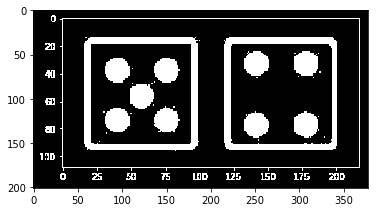

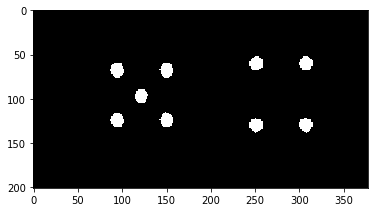

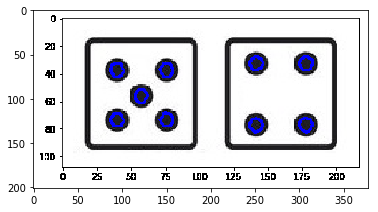

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('dados.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

_, w2 = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV) #seleciona apenas os pixels dentro do intervalo [240,255]

elementoEstruturante = cv2.getStructuringElement( cv2.MORPH_ELLIPSE, (5,5) ) 
w3 = cv2.erode(w2, elementoEstruturante, iterations = 3 ) 

(objetos, tree) = cv2.findContours(w3, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#A variável lx (lixo) recebe dados que não são utilizados

print("Quantidade de objetos: "+str(len(objetos)))

imgCopia = img.copy()

cv2.drawContours(imgCopia, objetos, -1, (0, 0, 255), 2)


plt.imshow(w2)
plt.show()
plt.imshow(w3)


plt.show()
plt.imshow(imgCopia)

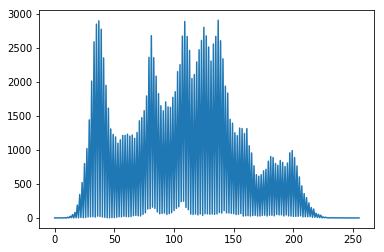

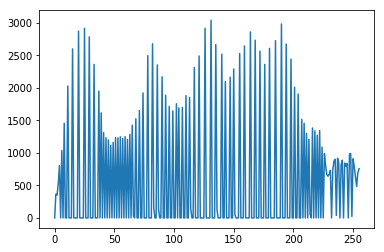

In [87]:
def calc_histograma(img):
    W = np.zeros((256,1))
    lin, col = img.shape
    hist = [0] * 256
    for i in range(lin):
        for j in range(col):
            W[img[i,j]] +=1
    
    return W


img = cv2.imread("lena.png", 0)
W = calc_histograma(img)
plt.plot(W)
plt.show()
# aumento de contraste

P = np.zeros((256,1))

for i in range(256):
    P[i] = W[i]/(lin*col)

CDF = np.zeros((256,1))

CDF[0] = P[0]
for i in range(1, 256):
    CDF[i] = CDF[i-1] + P[i]

novo = np.zeros((256,1))

for i in range(0,256):
    novo[i] = np.ceil(CDF[i] * 255)
    
for i in range(lin):
    for j in range(col):
        img[i,j] = novo[img[i,j]]
        
W2 = np.zeros(256)

alteradohist = calc_histograma(img)
plt.plot(alteradohist)
plt.show()

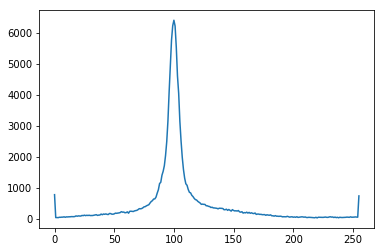

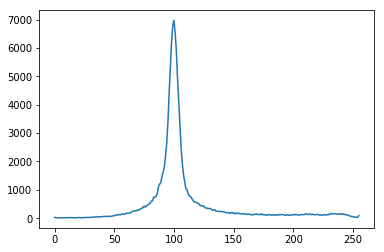

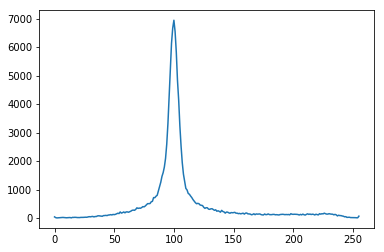

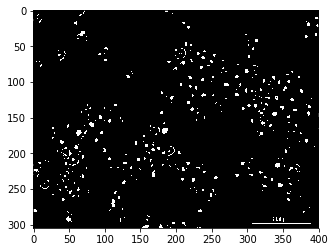

In [103]:
img = cv2.imread("../aula2/contagem_celulas.jpg")
l, c, ch = img.shape
W1 = np.zeros(256)
W2 = np.zeros(256)
W3 = np.zeros(256)

B = img[:, :, 0]
G = img[:, :, 1]
R = img[:, :, 2]

for i in range(l):
    for j in range(c):
        W1[B[i,j]] += 1
        W2[G[i,j]] += 1
        W3[R[i,j]] += 1
        
plt.plot(W1)
plt.show()
plt.plot(W2)
plt.show()
plt.plot(W3)
plt.show()


binary = np.zeros(img.shape[:2])
for i in range(l):
    for j in range(c):
        if B[i,j] > 200:
            binary[i,j] = 255
plt.imshow(binary)
plt.show()